In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns


In [3]:
train_df=pd.read_csv('train-flattened.csv')

/home/apratim941208/anaconda3/envs/ds/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
test_df=pd.read_csv('test-flattened.csv')

/home/apratim941208/anaconda3/envs/ds/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_df.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserSize                                        0
device.browserVersion                                     0
device.deviceCategory                                     0
device.flashVersion                                       0
device.isMobile                                           0
device.language                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceInfo                 

In [6]:
train_df["totals.transactionRevenue"].fillna(0, inplace=True)

In [7]:
train_df.shape, test_df.shape

((903653, 55), (804684, 53))

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.deviceCategory                                9036

In [9]:
train_df.columns.difference(test_df.columns)

Index(['totals.transactionRevenue', 'trafficSource.campaignCode'], dtype='object')

In [10]:
train_df =train_df.drop('trafficSource.campaignCode',axis=1)

In [11]:
train_df.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserSize                                        0
device.browserVersion                                     0
device.deviceCategory                                     0
device.flashVersion                                       0
device.isMobile                                           0
device.language                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceInfo                 

In [12]:
train_df.shape

(903653, 54)

In [13]:
train_df['totals.hits'].nunique()

274

In [14]:
constant_columns = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]

In [15]:
constant_columns

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [16]:
train_df = train_df.drop(constant_columns,axis=1)

In [17]:
test_df = test_df.drop(constant_columns,axis=1)

In [18]:
train_df.shape, test_df.shape

((903653, 35), (804684, 34))

In [19]:
# removed the constant columns; now we need to check what to do with missing values

In [20]:
train_df.select_dtypes(include=['integer']).columns, len(train_df.select_dtypes(include=['float']).columns)

(Index(['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.hits'], dtype='object'),
 5)

In [21]:
train_df.select_dtypes(include=['float']).columns, len(train_df.select_dtypes(include=['float']).columns)

(Index(['totals.bounces', 'totals.newVisits', 'totals.pageviews',
        'totals.transactionRevenue', 'trafficSource.adwordsClickInfo.page'],
       dtype='object'), 5)

In [22]:
train_df.select_dtypes(include=['object']).columns, len(train_df.select_dtypes(include=['object']).columns)

(Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
        'device.deviceCategory', 'device.operatingSystem', 'geoNetwork.city',
        'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro',
        'geoNetwork.networkDomain', 'geoNetwork.region',
        'geoNetwork.subContinent', 'trafficSource.adContent',
        'trafficSource.adwordsClickInfo.adNetworkType',
        'trafficSource.adwordsClickInfo.gclId',
        'trafficSource.adwordsClickInfo.isVideoAd',
        'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
        'trafficSource.isTrueDirect', 'trafficSource.keyword',
        'trafficSource.medium', 'trafficSource.referralPath',
        'trafficSource.source'],
       dtype='object'), 24)

In [23]:
train_df['device.isMobile']=train_df['device.isMobile'].astype('object')

In [24]:
train_df[['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.hits']] = train_df[['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.hits']].astype('float')

In [25]:
train_df.select_dtypes(include=['float']).columns, len(train_df.select_dtypes(include=['float']).columns)

(Index(['date', 'visitId', 'visitNumber', 'visitStartTime', 'totals.bounces',
        'totals.hits', 'totals.newVisits', 'totals.pageviews',
        'totals.transactionRevenue', 'trafficSource.adwordsClickInfo.page'],
       dtype='object'), 10)

In [26]:
# try label encoding the categorial features; then try normalizing the numerical feature; try any baseline model to check the natural log of sum of transactions

In [27]:
train_df.date.head(2)

0    20160902.0
1    20160902.0
Name: date, dtype: float64

In [28]:
date_check=train_df.date

In [29]:
date_check = date_check.astype('int')

In [30]:
date_check.head(2)

0    20160902
1    20160902
Name: date, dtype: int64

In [31]:
date_check = pd.to_datetime(date_check, format="%Y%m%d")


In [32]:

date_check.dt.weekday.head(10)

0    4
1    4
2    4
3    4
4    4
5    4
6    4
7    4
8    4
9    4
Name: date, dtype: int64

In [33]:
import datetime as dt

In [34]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [35]:

cal = calendar()

holidays=cal.holidays(start = date_check.min(), end = date_check.max())
holiday_var = date_check.isin(holidays)

In [36]:
holiday_var.nunique()

2

In [37]:
date_check.min()

Timestamp('2016-08-01 00:00:00')

In [38]:
date_check.head(2)

0   2016-09-02
1   2016-09-02
Name: date, dtype: datetime64[ns]

In [39]:
cal = calendar()

In [40]:
def add_date_features(df):
    df['date'] = df['date'].astype('int')
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")
    
    holidays = cal.holidays(start = df['date'].min(), end = df['date'].max())
    
    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    df['holiday_var'] = df['date'].isin(holidays)
    return df 

In [41]:
train_df = add_date_features(train_df)

In [42]:
test_df = add_date_features(test_df)

In [43]:
removing_features = ['sessionId','visitId','visitStartTime','visitNumber']

In [44]:
train_df.shape, test_df.shape

((903653, 39), (804684, 38))

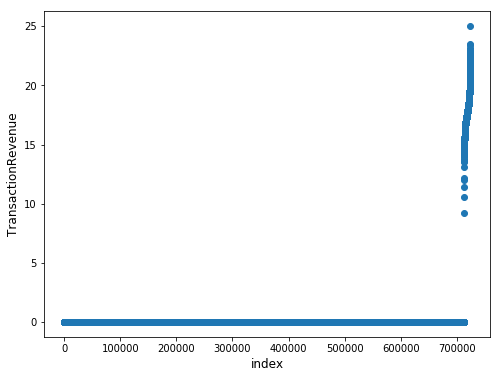

In [45]:
train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')
Vis_rev = train_df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(Vis_rev.shape[0]), np.sort(np.log1p(Vis_rev["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [46]:
train_df.dtypes, train_df.shape

(channelGrouping                                         object
 date                                            datetime64[ns]
 fullVisitorId                                           object
 sessionId                                               object
 visitId                                                float64
 visitNumber                                            float64
 visitStartTime                                         float64
 device.browser                                          object
 device.deviceCategory                                   object
 device.isMobile                                         object
 device.operatingSystem                                  object
 geoNetwork.city                                         object
 geoNetwork.continent                                    object
 geoNetwork.country                                      object
 geoNetwork.metro                                        object
 geoNetwork.networkDomain               

In [47]:
train_df['holiday_var'] = train_df['holiday_var'].astype('object')

In [48]:
test_df['holiday_var'] = test_df['holiday_var'].astype('object')

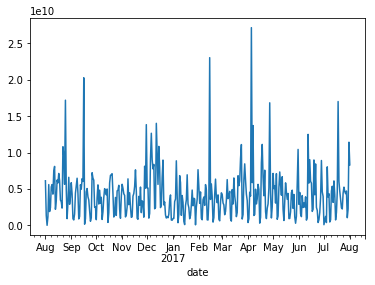

In [49]:
train_df.groupby('date')['totals.transactionRevenue'].agg('sum').plot()

In [50]:
# almost same graph for sum and count for date vs hits, page count and transaction revenue

In [51]:
categorical_columns = train_df.select_dtypes('object').columns

In [52]:
from sklearn import preprocessing

In [53]:

for col in categorical_columns:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

channelGrouping
fullVisitorId
sessionId
device.browser
device.deviceCategory
device.isMobile
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.isTrueDirect
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
holiday_var


In [54]:
train_df.select_dtypes('int').columns

Index(['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var'],
      dtype='object')

In [55]:
train_df[['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']]=train_df[['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']].astype('float')

In [56]:
test_df[['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']]=test_df[['channelGrouping', 'fullVisitorId', 'sessionId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']].astype('float')

In [57]:
train_df=train_df.drop('date',axis=1)


In [58]:
test_df = test_df.drop('date',axis=1)

In [59]:
train_df.head(3)

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,...,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,month,day,weekday,holiday_var
0,4.0,42803.0,192365.0,1.472830e+09,1.0,1.472830e+09,35.0,0.0,0.0,20.0,...,4.0,1.0,11.0,5.0,3196.0,208.0,9.0,2.0,4.0,0.0
1,4.0,425476.0,642618.0,1.472880e+09,1.0,1.472880e+09,43.0,0.0,0.0,7.0,...,4.0,1.0,11.0,5.0,3196.0,208.0,9.0,2.0,4.0,0.0
2,4.0,443255.0,663755.0,1.472865e+09,1.0,1.472865e+09,35.0,0.0,0.0,20.0,...,4.0,1.0,11.0,5.0,3196.0,208.0,9.0,2.0,4.0,0.0


In [60]:
train_df=train_df.drop(removing_features,axis=1)

In [61]:
test_df=test_df.drop(removing_features,axis=1)

In [62]:
train_df.shape, test_df.shape

((903653, 34), (804684, 33))

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_df.columns

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var'],
      dtype='object')

In [65]:
features=['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']

In [69]:
# ! pip install wheel


In [70]:
# !pip install cmake


In [71]:
# !pip install lightgbm

In [72]:
# !pip install xgboost

In [73]:
# !pip install catboost

In [77]:
train_df.shape, test_df.shape

((903653, 34), (804684, 33))

In [75]:
train_df.shape, test_df.shape

((903653, 34), (804684, 33))

In [80]:
train_df.isnull().sum()

channelGrouping                                      0
fullVisitorId                                        0
device.browser                                       0
device.deviceCategory                                0
device.isMobile                                      0
device.operatingSystem                               0
geoNetwork.city                                      0
geoNetwork.continent                                 0
geoNetwork.country                                   0
geoNetwork.metro                                     0
geoNetwork.networkDomain                             0
geoNetwork.region                                    0
geoNetwork.subContinent                              0
totals.bounces                                  453023
totals.hits                                          0
totals.newVisits                                200593
totals.pageviews                                   100
totals.transactionRevenue                            0
trafficSou

In [82]:
traintt = train_df

In [85]:
traintt['trafficSource.adwordsClickInfo.page'].value_counts()

1.0     21362
2.0        73
3.0        10
5.0         7
7.0         3
4.0         2
9.0         2
14.0        1
Name: trafficSource.adwordsClickInfo.page, dtype: int64

In [91]:
traintt = traintt.drop('trafficSource.adwordsClickInfo.page',axis=1)

In [93]:
var = traintt['totals.bounces'].isnull()

In [105]:
var = preprocessing.LabelEncoder().fit_transform(list(var))

In [106]:
var

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
traintt['bounces_check'] = traintt['totals.bounces']

In [86]:
traintt['totals.bounces'].value_counts()

1.0    450630
Name: totals.bounces, dtype: int64

In [87]:
traintt['totals.newVisits'].value_counts()

1.0    703060
Name: totals.newVisits, dtype: int64

In [108]:
traintt['totals.newVisits'] = traintt['totals.newVisits'] .fillna(0)

In [111]:
traintt['totals.newVisits'] = preprocessing.LabelEncoder().fit_transform(list(traintt['totals.newVisits']))

In [113]:
traintt['totals.bounces'] = preprocessing.LabelEncoder().fit_transform(list(traintt['totals.bounces']))

In [120]:
traintt['totals.pageviews'] = traintt['totals.pageviews'].fillna(1) 

In [133]:
traintt.columns

Index(['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var'],
      dtype='object')

In [137]:
train_xx = traintt[['channelGrouping', 'fullVisitorId', 'device.browser',
       'device.deviceCategory', 'device.isMobile', 'device.operatingSystem',
       'geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country',
       'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
       'geoNetwork.subContinent', 'totals.bounces', 'totals.hits',
       'totals.newVisits', 'totals.pageviews',
       'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'month', 'day', 'weekday', 'holiday_var']]

In [128]:
train_y = np.log1p(traintt['totals.transactionRevenue'])

In [139]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(train_xx, train_y, test_size=0.33, random_state=42)

In [142]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : "rmse",
             "num_leaves" : 50, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_test, label=y_test)
model = lgb.train(lgb_params, lgb_train, 700, valid_sets=[lgb_val], early_stopping_rounds=150, verbose_eval=20)

Training until validation scores don't improve for 150 rounds.
[20]	valid_0's rmse: 1.84109
[40]	valid_0's rmse: 1.74815
[60]	valid_0's rmse: 1.6993
[80]	valid_0's rmse: 1.6742
[100]	valid_0's rmse: 1.65917
[120]	valid_0's rmse: 1.65021
[140]	valid_0's rmse: 1.64363
[160]	valid_0's rmse: 1.63887
[180]	valid_0's rmse: 1.6359
[200]	valid_0's rmse: 1.63362
[220]	valid_0's rmse: 1.63196
[240]	valid_0's rmse: 1.63037
[260]	valid_0's rmse: 1.62902
[280]	valid_0's rmse: 1.62801
[300]	valid_0's rmse: 1.62731
[320]	valid_0's rmse: 1.6269
[340]	valid_0's rmse: 1.62649
[360]	valid_0's rmse: 1.6263
[380]	valid_0's rmse: 1.62591
[400]	valid_0's rmse: 1.62546
[420]	valid_0's rmse: 1.62522
[440]	valid_0's rmse: 1.62514
[460]	valid_0's rmse: 1.62514
[480]	valid_0's rmse: 1.62513
[500]	valid_0's rmse: 1.62511
[520]	valid_0's rmse: 1.62506
[540]	valid_0's rmse: 1.62497
[560]	valid_0's rmse: 1.62513
[580]	valid_0's rmse: 1.62499
[600]	valid_0's rmse: 1.62499
[620]	valid_0's rmse: 1.62516
[640]	valid_0's 

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import model_selection, preprocessing, metrics

In [145]:
train_xx.shape, train_y.shape

((903653, 32), (903653,))

In [146]:
train_xx.describe()

,channelGrouping,fullVisitorId,device.browser,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,...,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,month,day,weekday,holiday_var
count,903653.000000,9.036530e+05,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,...,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,4.632267,6.724954e+05,44.014666,0.298370,0.264618,12.949865,740.380483,2.716869,163.035326,85.871039,...,4.280819,0.696781,1897.047624,4.456896,2684.468135,254.317229,6.987671,15.697570,2.735183,0.026075
std,1.774791,3.784343e+05,15.389741,0.526058,0.441130,8.159630,302.648488,0.885558,69.196953,50.605625,...,1.510145,0.459649,1640.605290,2.076703,974.303431,166.515464,3.484576,8.823674,1.929072,0.159359
min,0.000000,7.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,3.452660e+05,35.000000,0.000000,0.000000,7.000000,540.000000,2.000000,97.000000,46.000000,...,4.000000,0.000000,11.000000,5.000000,2604.000000,208.000000,4.000000,8.000000,1.000000,0.000000
50%,4.000000,6.721800e+05,35.000000,0.000000,0.000000,20.000000,955.000000,2.000000,210.000000,122.000000,...,4.000000,1.000000,3327.000000,5.000000,3196.000000,208.000000,7.000000,16.000000,3.000000,0.000000
75%,7.000000,9.998650e+05,47.000000,1.000000,1.000000,20.000000,955.000000,3.000000,218.000000,122.000000,...,4.000000,1.000000,3327.000000,6.000000,3196.000000,417.000000,10.000000,23.000000,4.000000,0.000000
max,7.000000,1.328201e+06,117.000000,2.000000,1.000000,23.000000,955.000000,5.000000,227.000000,122.000000,...,34.000000,1.000000,5391.000000,6.000000,3196.000000,499.000000,12.000000,31.000000,6.000000,1.000000


In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
train_xx2 = StandardScaler().fit_transform(train_xx)

/home/apratim941208/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/apratim941208/anaconda3/envs/ds/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [149]:
train_xx2

array([[-0.35624892, -1.66394191, -0.58575846, ..., -1.55236669,
         0.65566138, -0.16362579],
       [-0.35624892, -0.65274074, -0.06593136, ..., -1.55236669,
         0.65566138, -0.16362579],
       [-0.35624892, -0.6057603 , -0.58575846, ..., -1.55236669,
         0.65566138, -0.16362579],
       ...,
       [ 1.33409187,  0.10214367, -1.04060717, ..., -1.32570361,
        -0.38110709, -0.16362579],
       [ 1.33409187, -1.05964646, -0.58575846, ..., -1.32570361,
        -0.38110709, -0.16362579],
       [ 1.33409187,  1.02374139, -0.58575846, ..., -1.32570361,
        -0.38110709, -0.16362579]])

In [150]:
X_train, X_test, y_train, y_test = train_test_split(train_xx2, train_y, test_size=0.33, random_state=42)

In [151]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : "rmse",
             "num_leaves" : 50, "learning_rate" : 0.02, 
              "bagging_fraction" : 0.75, "feature_fraction" : 0.8, "bagging_frequency" : 9}
    
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_val = lgb.Dataset(X_test, label=y_test)
model = lgb.train(lgb_params, lgb_train, 700, valid_sets=[lgb_val], early_stopping_rounds=150, verbose_eval=20)

Training until validation scores don't improve for 150 rounds.
[20]	valid_0's rmse: 1.84117
[40]	valid_0's rmse: 1.74814
[60]	valid_0's rmse: 1.69924
[80]	valid_0's rmse: 1.67395
[100]	valid_0's rmse: 1.65895
[120]	valid_0's rmse: 1.64972
[140]	valid_0's rmse: 1.64364
[160]	valid_0's rmse: 1.63905
[180]	valid_0's rmse: 1.63561
[200]	valid_0's rmse: 1.63351
[220]	valid_0's rmse: 1.63175
[240]	valid_0's rmse: 1.63037
[260]	valid_0's rmse: 1.62895
[280]	valid_0's rmse: 1.62802
[300]	valid_0's rmse: 1.6273
[320]	valid_0's rmse: 1.62685
[340]	valid_0's rmse: 1.62646
[360]	valid_0's rmse: 1.62626
[380]	valid_0's rmse: 1.62576
[400]	valid_0's rmse: 1.62549
[420]	valid_0's rmse: 1.62541
[440]	valid_0's rmse: 1.6252
[460]	valid_0's rmse: 1.62492
[480]	valid_0's rmse: 1.62503
[500]	valid_0's rmse: 1.62479
[520]	valid_0's rmse: 1.62476
[540]	valid_0's rmse: 1.62479
[560]	valid_0's rmse: 1.62466
[580]	valid_0's rmse: 1.62463
[600]	valid_0's rmse: 1.62472
[620]	valid_0's rmse: 1.62467
[640]	valid_0

In [152]:
train_xx2.shape, train_y.shape

((903653, 32), (903653,))

In [153]:
import xgboost

In [159]:
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [160]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((605447, 32), (298206, 32), (605447,), (298206,))

In [161]:
kfold = KFold(n_splits=10, random_state=7)

In [162]:
skf = StratifiedKFold(n_splits=10, random_state=7)

In [164]:
from sklearn.model_selection import cross_val_score

In [169]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
# rest of the code

In [170]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [171]:
model2 = Sequential()
model2.add(Dense(64, input_dim=32, kernel_initializer='normal', activation='relu'))
model2.add(Dense(32, kernel_initializer='normal'))
model2.add(Dense(1))
# Compile model
model2.compile(loss='mean_squared_error', optimizer='rmsprop')

In [172]:
y_train2 = y_train

In [173]:
y_test2 = y_test

In [179]:
y_train2 = y_train2.values.reshape(-1,1)

In [181]:
y_test2 = y_test2.values.reshape(-1,1)

In [182]:
y_train2.shape, y_test2.shape

((605447, 1), (298206, 1))

In [184]:

model2.fit(X_train, y_train2, epochs=10, verbose=0)

In [185]:
predictions_NN = model2.predict(X_test)

In [186]:

metrics.mean_squared_error(y_test2,predictions_NN)

2.8680807047084427

In [198]:
np.sqrt(metrics.mean_squared_error(y_test2,predictions_NN))

1.689863194207779